In [1]:
%matplotlib inline
import matplotlib.pylab as plt
from getdist import plots, MCSamples,loadMCSamples
import getdist
import planckStyle as s
import numpy as np
import os
%config InlineBackend.figure_format = 'retina'
from matplotlib import rcParams
params = {'backend': 'pdf',
          'axes.labelsize': 18,
          'font.size': 18,
          'legend.fontsize': 16,
          'xtick.labelsize': 18,
          'ytick.labelsize': 18,
          'ytick.major.pad': 4,
          'xtick.major.pad': 4,
          'text.usetex': True,
          'figure.dpi': 600.0,
          'legend.labelspacing': 0.3,
          'font.family': 'sans-serif',
          # free font similar to Helvetica
          'font.sans-serif': 'FreeSans'}


# use of Sans Serif also in math mode
rcParams.update(params)
plots.defaultSettings.legend_frame=False

/users/evam/eBOSSCOSMO/CosmoMC_SDSS2020/main/base_omegak_w_mnu/CMBLens_DES_SN/base_omegak_w_mnu_CMBLens_DES_SN_1.txt
/users/evam/eBOSSCOSMO/CosmoMC_SDSS2020/main/base_omegak_w_mnu/CMBLens_DES_SN/base_omegak_w_mnu_CMBLens_DES_SN_2.txt
/users/evam/eBOSSCOSMO/CosmoMC_SDSS2020/main/base_omegak_w_mnu/CMBLens_DES_SN/base_omegak_w_mnu_CMBLens_DES_SN_3.txt
/users/evam/eBOSSCOSMO/CosmoMC_SDSS2020/main/base_omegak_w_mnu/CMBLens_DES_SN/base_omegak_w_mnu_CMBLens_DES_SN_4.txt
Removed 0.3 as burn in


/users/evam/eBOSSCOSMO/CosmoMC_SDSS2020/main/base_omegak_w_mnu/CMBLens_BAORSD_DES_SN/base_omegak_w_mnu_CMBLens_BAORSD_DES_SN_1.txt
/users/evam/eBOSSCOSMO/CosmoMC_SDSS2020/main/base_omegak_w_mnu/CMBLens_BAORSD_DES_SN/base_omegak_w_mnu_CMBLens_BAORSD_DES_SN_2.txt
/users/evam/eBOSSCOSMO/CosmoMC_SDSS2020/main/base_omegak_w_mnu/CMBLens_BAORSD_DES_SN/base_omegak_w_mnu_CMBLens_BAORSD_DES_SN_3.txt
/users/evam/eBOSSCOSMO/CosmoMC_SDSS2020/main/base_omegak_w_mnu/CMBLens_BAORSD_DES_SN/base_omegak_w_mnu_CMBLens_BAORSD_DES_SN_4.txt
Removed 0.3 as burn in


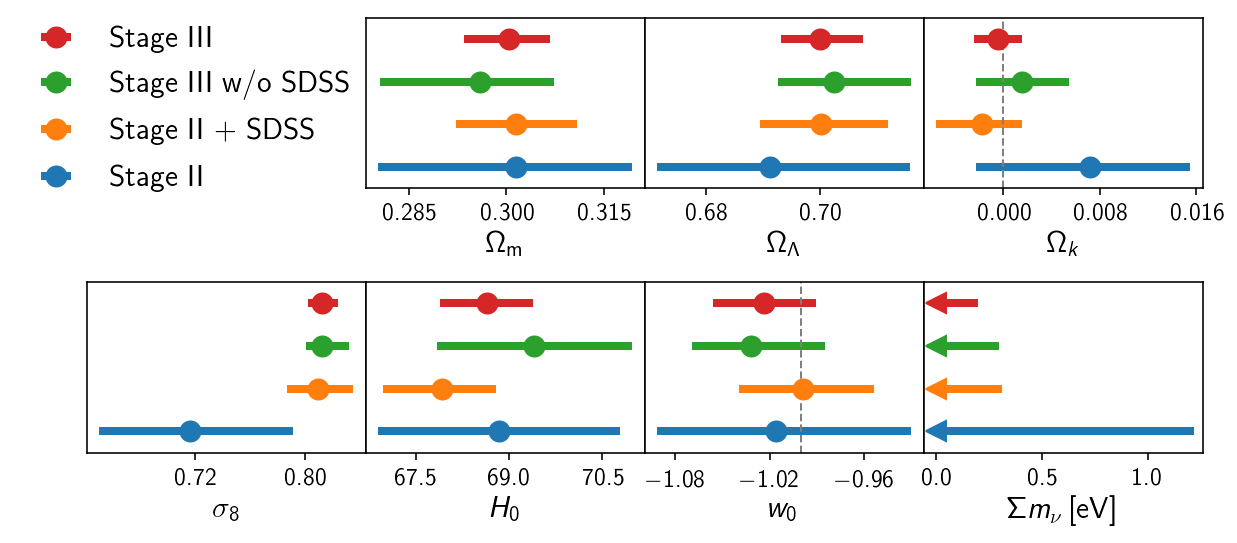

In [5]:
g = s.getSubplotPlotter()
plt.rc('xtick', labelsize=12)
plt.rc('axes', labelsize=15)
plt.rc('legend', fontsize=15)
plt.rc('lines', lw=4, markersize=10)
plt.rc('marker')
plt.rcParams.update({'font.size': 20})
plt.rcParams['axes.facecolor']='white'

fig , axs = plt.subplots(2, 4, figsize=(10, 4),sharey=True)
fig.subplots_adjust(wspace=0,hspace=0.55)

pars = ['omegak','w','mnu']

toppars = ['omegam','omegal', 'omegak','sigma8','H0','w','mnu']

datatag = ['WMAP_JLA_DR7','WMAP_JLA_BAORSD','CMBLens_DES_SN','CMBLens_BAORSD_DES_SN']
dataLabel = ['Stage II', 'Stage II + SDSS','Stage III w/o SDSS', 'Stage III']
y=[0.5,1.5,2.5,3.5]
for i,ax in enumerate(axs.flatten()[1::]):
    p = toppars[i]
    for j, dat in enumerate(datatag):
        samples = g.getSamples('_'.join(pars), dat)
        samples.paramNames.setLabelsAndDerivedFromParamNames(g.settings.param_names_for_labels)
        stats = samples.getMargeStats()
        if p is 'mnu':
            ax.plot([0,stats.parWithName(p).limits[1].upper],[y[j],y[j]],marker='<',markevery=2)
        else:
            lower_error = stats.parWithName(p).mean-stats.parWithName(p).limits[0].lower
            upper_error = stats.parWithName(p).limits[0].upper - stats.parWithName(p).mean
            asymmetric_error = [[lower_error], [upper_error]]
            ax.errorbar(stats.parWithName(p).mean,y[j],xerr=asymmetric_error,fmt='o',label=dataLabel[j])
        ax.set_xlabel(samples.paramNames.parWithName(p).getLabel().join('$$'))
        ax.set_yticks([])
        ax.set_ylim(0,4)
        ax.xaxis.set_major_locator(plt.MaxNLocator(3))

axs[0,1].legend(bbox_to_anchor=(0,0,1.05,0.3), bbox_transform=axs[0,0].transAxes,labelspacing=-2.5,frameon=False)
axs[0,0].set_axis_off()
axs[0,3].set_xlabel(r'$\Omega_k$')
axs[0,3].axvline(0.,linestyle='dashed',linewidth=1,color='grey')
axs[1,2].axvline(-1,linestyle='dashed',linewidth=1,color='grey')

plt.savefig('plots_final/decadal.pdf')
plt.savefig('plots_final/decadal.png')

In [5]:
g = s.getSubplotPlotter()

pars = ['omegak','w','mnu']
toppars = ['H0','sigma8','omegak','w','mnu']
Npar = len(toppars)

datatag = ['WMAP_JLA_DR7','WMAP_JLA_BAORSD','CMBLens_DES_SN','CMBLens_BAORSD_DES_SN']
dataLabel = ['Stage-II', 'Stage-II + SDSS','Stage-III w/o SDSS', 'Stage-III']

lines = []
heading = '\n & FoM'

FoM=[]

for j, dat in enumerate(datatag):
    print(pars,dat)
    samples = g.getSamples('_'.join(pars), dat) 
    samples.paramNames.setLabelsAndDerivedFromParamNames(g.settings.param_names_for_labels)
    stats = samples.getMargeStats()
    FoM = np.linalg.det(samples.cov(pars=toppars))**(-1./2./Npar)
    lines.append(dataLabel[j] +'&'+'%s' % int(float('%.4g' % FoM))+'\\\ ' )
    
print(lines)
savefile = '../python/tables/Table_FoM_5pars_Decadel.tex'
outF = open(savefile, "w")
outF.writelines('\\begin{tabular}{l|c}')
outF.writelines('\n \hline')
outF.writelines('\n \hline')
outF.writelines(heading + '\\\\\n\\hline\n' + '\n'.join(lines) + '\\\\\n')
outF.writelines('\hline \n')
outF.writelines('\\end{tabular}\n ')
outF.close()

(['omegak', 'w', 'mnu'], 'WMAP_JLA_DR7')


(['omegak', 'w', 'mnu'], 'WMAP_JLA_BAORSD')


(['omegak', 'w', 'mnu'], 'CMBLens_BAORSD_DES_SN')
/users/evam/eBOSSCOSMO/CosmoMC_SDSS2020/main/base_omegak_w_mnu/CMBLens_BAORSD_DES_SN/base_omegak_w_mnu_CMBLens_BAORSD_DES_SN_1.txt
/users/evam/eBOSSCOSMO/CosmoMC_SDSS2020/main/base_omegak_w_mnu/CMBLens_BAORSD_DES_SN/base_omegak_w_mnu_CMBLens_BAORSD_DES_SN_2.txt
/users/evam/eBOSSCOSMO/CosmoMC_SDSS2020/main/base_omegak_w_mnu/CMBLens_BAORSD_DES_SN/base_omegak_w_mnu_CMBLens_BAORSD_DES_SN_3.txt
/users/evam/eBOSSCOSMO/CosmoMC_SDSS2020/main/base_omegak_w_mnu/CMBLens_BAORSD_DES_SN/base_omegak_w_mnu_CMBLens_BAORSD_DES_SN_4.txt
Removed 0.3 as burn in
['Stage-II&11\\\\ ', 'Stage-II + SDSS&24\\\\ ', 'Stage-III w/o SDSS&44\\\\ ']


In [3]:
g = s.getSubplotPlotter()

pars = ['omegak','w','wa']
toppars = ['w','wa']
Npar = len(toppars)

datatag = ['WMAP_JLA_DR7','WMAP_JLA_BAORSD','CMBLens_DES_SN','CMBLens_BAORSD_DES_SN']
dataLabel = ['Stage-II', 'Stage-II + SDSS','Stage-III w/o SDSS', 'Stage-III']

lines = []
heading = '\n & FoM'

FoM=[]

for j, dat in enumerate(datatag):
    print(pars,dat)
    samples = g.getSamples('_'.join(pars), dat) 
    samples.paramNames.setLabelsAndDerivedFromParamNames(g.settings.param_names_for_labels)
    stats = samples.getMargeStats()
    FoM = np.linalg.det(samples.cov(pars=toppars))**(-1./2./Npar)
    print(FoM)

(['omegak', 'w', 'wa'], 'WMAP_JLA_BAORSD')


Exception: No match for paramtag, datatag... omegak_w_wa, WMAP_JLA_BAORSD